# Nonlinear oscillation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint, solve_ivp

%matplotlib inline

In [2]:
def plot_system(q, p, t):
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    
    plt.plot(q,p)
    plt.xlabel("q")
    plt.ylabel("p")
    
    plt.subplot(1,2,2)
    
    plt.plot(t,q)
    plt.xlabel("t")
    plt.ylabel("q")

In [3]:
def solve(f, tf, initial, args):    
    sol = solve_ivp(f, (0, tf), initial, args=args, max_step=10**-2)
    return sol.t, sol.y[0, :], sol.y[1, :]

## Van der Pol

$$ \ddot{x} + \omega^2x = \mu(1-x^2)\dot{x} + kx \cos({\lambda t}) $$

In [4]:
def van_der_pol(t, initial, w, u, k, la):
    x, v = initial    
    a = -w**2*x + k*x*np.cos(la * t) + u*(1-x**2)*v    
    return [v, a]

In [5]:
x0 = 0
v0 = 1
w = 1
u = 1 #0
k = 1
la = 1

t,p,q = solve(van_der_pol, 75, (x0, v0), (w,u,k,la))

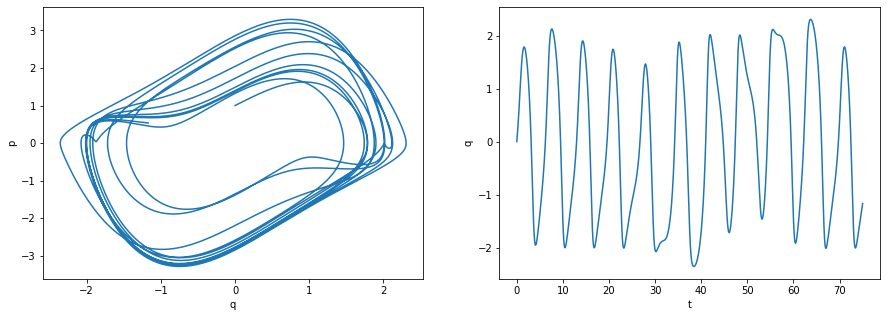

In [6]:
plot_system(p,q,t)

## Mathieu

$$ \ddot{x} + x(\omega^2 + \varepsilon \cos(\lambda t)) = 0 $$

In [7]:
def mathieu(t, initial, w, e, la):
    x,v = initial    
    a = -(w**2 + e*np.cos(la*t))*x
    return [v,a]

In [8]:
x0 = 0
v0 = 1
w = 0.3
e = 0.1
la = 1 #0.3

t,p,q = solve(mathieu, 100, (x0, v0), (w,e,la))

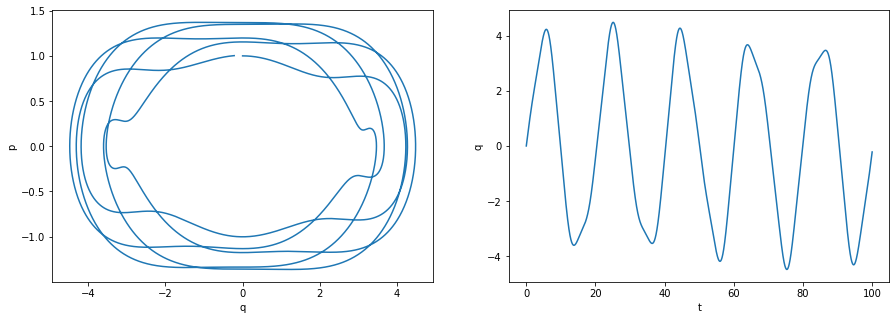

In [9]:
plot_system(p,q,t)

## Duffing oscillator

$$ \ddot{x} + \omega^2x + \varepsilon x^3 = k \cos(\lambda t) $$

In [10]:
def duffing(t, initial, w, e, k, la):
    x,v = initial    
    a = -w**2*x - e*x**3 + k*np.cos(la*t)
    return [v,a]

In [11]:
x0 = 0
v0 = 1
w = 1
e = 1
k = 1
la = 1

t,p,q = solve(duffing, 30, (x0, v0), (w,e,k,la))

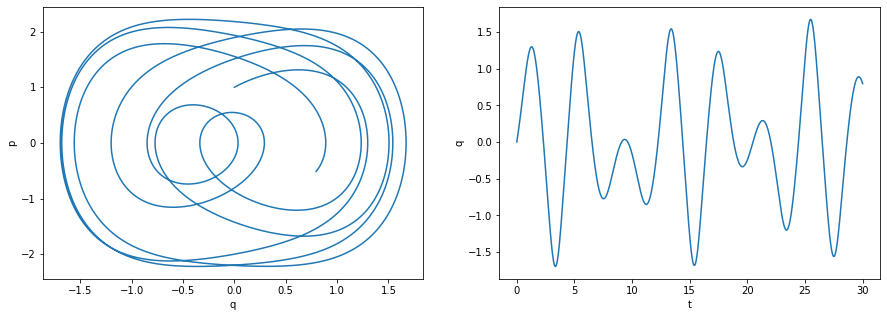

In [12]:
plot_system(p,q,t)

## Elastic pendulum

$$\begin{cases} x = r \sin{\varphi} \\
y = -r \cos{\varphi}\end{cases} \Rightarrow
\begin{cases} \dot{x} = \dot{r} \sin{\varphi} + r \dot{\varphi} \cos{\varphi} \\
\dot{y} =  -\dot{r} \cos{\varphi} + r \dot{\varphi} \sin{\varphi} \end{cases}$$

$$ \mathcal{L} = \frac{m(\dot{r}^2 + r^2\dot{\varphi}^2)}{2} + mgr\cos{\varphi} - \frac{k(r-l)^2}{2} $$

$$\begin{cases} \frac{d}{dt} \frac{\partial}{\partial \dot{r}} \mathcal{L} = m\ddot{r} \\
\frac{d}{dt} \frac{\partial}{\partial \dot{\varphi}} \mathcal{L} = 2mr\dot{r}\dot{\varphi} + mr^2\ddot{\varphi} \end{cases}$$

$$\begin{cases} m\ddot{r} - mr\dot{\varphi}^2 + k(r-l) - mg\cos{\varphi} = 0 \\ 
r\ddot{\varphi} + 2\dot{r}\dot{\varphi} + g \sin{\varphi} = 0
\end{cases}$$

In [13]:
def elastic_pendulum(t, initial, m, k, l):
    r, dr, phi, dphi = initial        
    g = 9.81    
    
    ar = (-k*(r-l) + m*r*dphi**2 + m*g*np.cos(phi))/m
    aphi = (-g*np.sin(phi) - 2*dr*dphi)/r
    
    return [dr, ar, dphi, aphi]

In [14]:
r0 = 2
dr0 = 0
phi0 = np.pi/2
dphi0 = 0

m = 1
k = 30
l = 2

sol = solve_ivp(elastic_pendulum, (0, 15), (r0, dr0, phi0, dphi0), args=(m,k,l), max_step=10**-2)

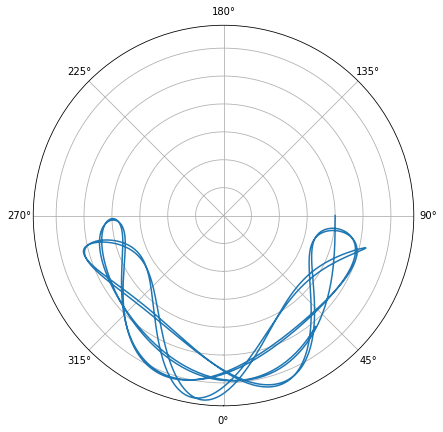

In [15]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, polar=True)

ax.plot(sol.y[2], sol.y[0])

ax.tick_params(labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax.set_theta_zero_location("S")